# Low and Lou NLFFF visualization
> Draw field lines

In [ ]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

In [ ]:
#| eval:false
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True

In [ ]:
from zpinn.lowloumag import LowLouMag

In [ ]:
b = LowLouMag()
b

### Low and Lou (1990) NLFFF
bounds = [-1, 1, -1, 1, 0, 2]<br>
resolutions = [64, 64, 64]<br>
n = 1<br>
m = 1<br>
l = 0.3<br>
Phi = 1.5707963267948966<br>


In [ ]:
b.calculate()

In [ ]:
b.grid

ImageData (0x7fd2f43c2920)
  N Cells:      250047
  N Points:     262144
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   64, 64, 64
  Spacing:      3.175e-02, 3.175e-02, 3.175e-02
  N Arrays:     3

In [ ]:
x_ind_min, y_ind_min, z_ind_min = 0, 0, 0
Nx, Ny, Nz = b.grid.dimensions
x_ind_max, y_ind_max, z_ind_max = Nx-1, Ny-1, Nz-1

bottom_subset = (x_ind_min, x_ind_max, y_ind_min, y_ind_max, 0, 0)

In [ ]:
bottom = b.grid.extract_subset(bottom_subset)
bottom.active_vectors_name = 'B'
bottom.active_scalars_name = 'mag'
bottom

ImageData (0x7fd2cbcebdc0)
  N Cells:      3969
  N Points:     4096
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   64, 64, 1
  Spacing:      3.175e-02, 3.175e-02, 3.175e-02
  N Arrays:     3

In [ ]:
bottom.x.shape, bottom.y.shape, bottom['B'].shape, bottom['alpha'].shape

((4096,), (4096,), (4096, 3), (4096,))

In [ ]:
x_bottom = bottom.x.reshape(Nx, Ny)
y_bottom = bottom.y.reshape(Nx, Ny)
B_bottom = bottom['B'].reshape(Nx, Ny, 3)
alpha_bottom = bottom['alpha'].reshape(Nx, Ny)

x_bottom.shape, y_bottom.shape, B_bottom.shape, alpha_bottom.shape

((64, 64), (64, 64), (64, 64, 3), (64, 64))

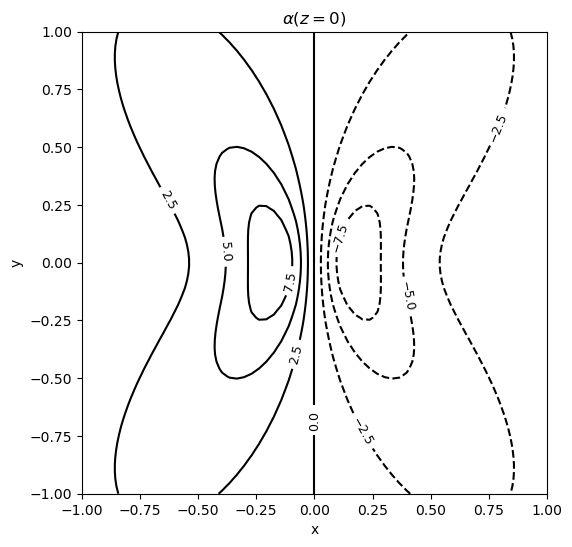

In [ ]:
#| eval:false
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.contour(x_bottom, y_bottom, alpha_bottom, 
                 origin='lower', colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title(r"$\alpha(z=0)$")
plt.show()

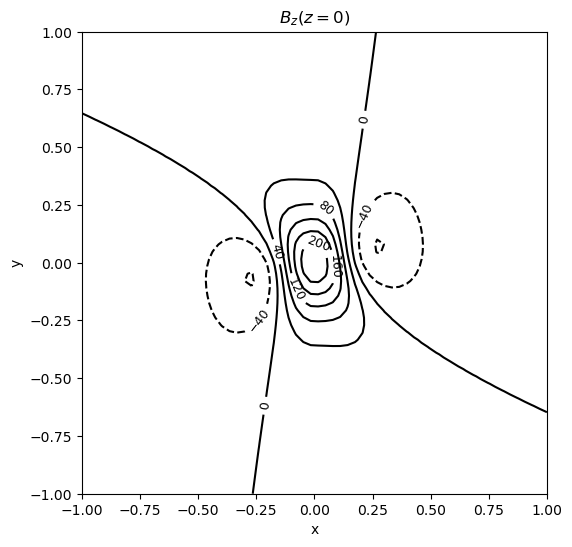

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.contour(x_bottom, y_bottom, B_bottom[:, :, 2], 
                 origin='lower', colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title(r"$B_z(z=0)$")
plt.show()

In [ ]:
import copy

In [ ]:
grid_mesh = copy.deepcopy(b.grid)
grid_mesh

ImageData (0x7fd2cbd306a0)
  N Cells:      250047
  N Points:     262144
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   64, 64, 64
  Spacing:      3.175e-02, 3.175e-02, 3.175e-02
  N Arrays:     3

In [ ]:
bottom_mesh = copy.deepcopy(bottom)
bottom_mesh

ImageData (0x7fd2601aaf20)
  N Cells:      3969
  N Points:     4096
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   64, 64, 1
  Spacing:      3.175e-02, 3.175e-02, 3.175e-02
  N Arrays:     3

In [ ]:
bottom_surface = bottom_mesh.extract_surface()
bottom_surface

PolyData (0x7fd2601abe20)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   -1.000e+00, 1.000e+00
  Y Bounds:   -1.000e+00, 1.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   5

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
p.add_mesh(bottom_surface)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd21c31f2e0_22&reconnect=auto' style='width: 99%; h…

In [ ]:
def draw_alpha_bottom(p):
    ctr = bottom_surface.contour(scalars='alpha')
    p.add_mesh(ctr, cmap='plasma')

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_alpha_bottom(p)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd14e804400_62&reconnect=auto' style='width: 99%; h…

In [ ]:
def draw_alpha_3D(p):
    ctr = grid_mesh.contour(scalars='alpha')
    p.add_mesh(ctr, cmap='plasma', opacity=0.5)

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_alpha_3D(p)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd1c25edff0_72&reconnect=auto' style='width: 99%; h…

In [ ]:
def draw_Bz_bottom(p):
    sargs = dict(title="B_z")
    ctr = bottom_surface.contour(scalars=bottom_surface['B'][:, 2])
    p.add_mesh(ctr, cmap='plasma', scalar_bar_args=sargs)

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_Bz_bottom(p)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd1efb941f0_60&reconnect=auto' style='width: 99%; h…

In [ ]:
def draw_Bz_3D(p):
    sargs = dict(title="B_z")
    ctr = grid_mesh.contour(scalars=grid_mesh['B'][:, 2])
    p.add_mesh(ctr, cmap='plasma', scalar_bar_args=sargs, opacity=0.5)

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_Bz_3D(p)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd143aff730_73&reconnect=auto' style='width: 99%; h…

In [ ]:
def draw_streamline(p, noseed=False):
    seed = pv.Plane(center=(0,0,0), direction=(0,0,1), 
                i_size=2, j_size=2, 
                i_resolution=10, j_resolution=10)
    if noseed == False: p.add_mesh(seed)
    strl = grid_mesh.streamlines_from_source(seed,
                                             vectors='B',
                                             max_time=180,
                                             initial_step_length=0.1,
                                             integration_direction='both')
    
    p.add_mesh(strl.tube(radius=0.005), cmap='bwr', ambient=0.2)

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_alpha_bottom(p)
draw_streamline(p)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd14c71b220_70&reconnect=auto' style='width: 99%; h…

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_alpha_3D(p)
draw_streamline(p, noseed=True)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd143aff070_74&reconnect=auto' style='width: 99%; h…

In [ ]:
#| eval:false
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid_mesh.outline())
draw_Bz_3D(p)
draw_streamline(p, noseed=True)
p.show()

Widget(value="<iframe src='/proxy/35431/index.html?ui=P_0x7fd143aff550_75&reconnect=auto' style='width: 99%; h…